In [20]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [21]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

In [22]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()


In [23]:
# Normalize the data (scale the pixel values to range [0, 1])
X_train, X_test = X_train / 255.0, X_test / 255.0


In [24]:
# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [25]:
# Build a simple CNN model
model = models.Sequential()


In [26]:
# First Convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Second Convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [28]:
# Third Convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [29]:
# Flatten the data to feed it into Dense layers
model.add(layers.Flatten())


In [30]:
# Fully connected Dense layer
model.add(layers.Dense(64, activation='relu'))


In [31]:
# Output layer (10 categories for CIFAR-10)
model.add(layers.Dense(10, activation='softmax'))


In [32]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [33]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3527 - loss: 1.7518 - val_accuracy: 0.5421 - val_loss: 1.2865
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5749 - loss: 1.1897 - val_accuracy: 0.5930 - val_loss: 1.1296
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6416 - loss: 1.0123 - val_accuracy: 0.6618 - val_loss: 0.9694
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6788 - loss: 0.9099 - val_accuracy: 0.6651 - val_loss: 0.9722
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7056 - loss: 0.8357 - val_accuracy: 0.6738 - val_loss: 0.9475
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7339 - loss: 0.7641 - val_accuracy: 0.6873 - val_loss: 0.9184
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7485 - loss: 0.7117 - val_accuracy: 0.6865 - val_loss: 0.9148
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7654 - loss: 0

In [34]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')


313/313 - 1s - 2ms/step - accuracy: 0.7077 - loss: 0.8867
Test accuracy: 0.7077


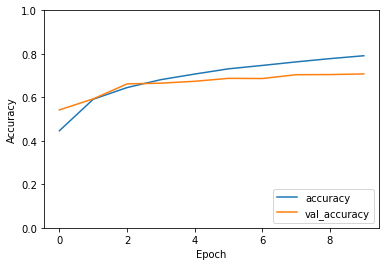

In [35]:
# Plot accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [36]:
# Make predictions on the test set
y_pred = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [37]:
# Visualizing a few test images with predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


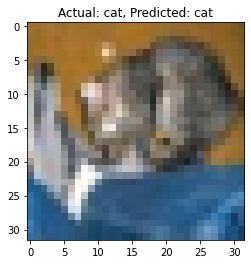

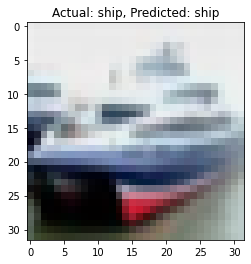

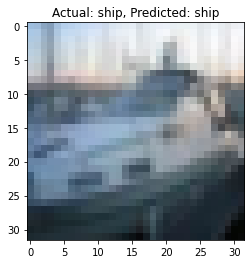

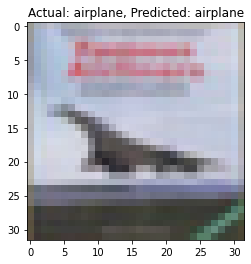

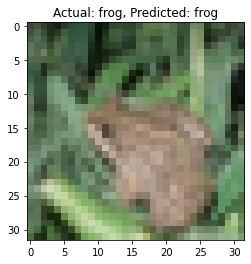

In [39]:
# Displaying the first 5 images and their predicted labels
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Actual: {class_names[np.argmax(y_test[i])]}, Predicted: {class_names[np.argmax(y_pred[i])]}")
    plt.show()